<a href="https://colab.research.google.com/github/soopools/EngineeringDesign-2023fall/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **9/19/23 Week 3**

In [ ]:
import numpy as np

a = np.array([[1, 3], [5, 7]])
b = np.array([[2, 4], [6, 8]])
c = np.array([[4, 5], [6, 7]])

print(a)
print(a.shape)

print(b)
print(b.shape)

print(c)
print(c.shape)

# https://velog.io/@mingki/Numpy-%EB%B0%B0%EC%97%B4%EC%9D%98-%EC%9E%AC%EA%B5%AC%EC%A1%B0%ED%99%94%EC%99%80-%ED%95%A9%EC%B9%98%EA%B8%B0
# reshape 로 하라고 햇는데 구냥 콘케이트네이트 씀 ,,
arr = np.concatenate([a, b, c], 1)
print(arr)
print(arr.shape)


[[1 3]
 [5 7]]
(2, 2)
[[2 4]
 [6 8]]
(2, 2)
[[4 5]
 [6 7]]
(2, 2)
[[1 3 2 4 4 5]
 [5 7 6 8 6 7]]
(2, 6)


In [ ]:
import numpy as np
a = np.random.randint(1, 100, (10, 10))

print('Original:\n', a)
print('Sliced (a[:9, 1:2]):\n', a[:9, 1:2]) # 앞에가 행 # 뒤에는 열
print('Reversing the first row (a[2, ::-8]) :\n', a[2, ::-8])
print('slice the first row by the [...] operator: \n', a[0, ...])

Original:
 [[12 20 34 95  7 35 39 98 18 56]
 [46 43 95 26 54 46 35 49 77 16]
 [21  1 73 27 61 30 27 74 33 70]
 [70 31 72 90 81 35 63 29 32 51]
 [89 95 21  5 31 71 60 48 21 51]
 [32 25 68  4 55 85 81 30 67 74]
 [87 57 49 52 60 16 79 57 87 26]
 [84 72 59 39 54 14 26 30 39 81]
 [56 28 48 30 77 63 79 85 86 46]
 [63 20 61 57 44 15 56 70 82 13]]
Sliced (a[:9, 1:2]):
 [[20]
 [43]
 [ 1]
 [31]
 [95]
 [25]
 [57]
 [72]
 [28]]
Reversing the first row (a[2, ::-8]) :
 [70  1]
slice the first row by the [...] operator: 
 [12 20 34 95  7 35 39 98 18 56]


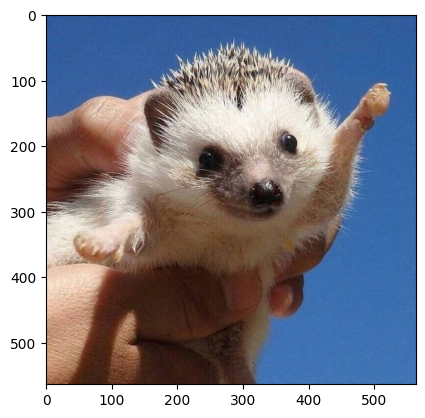

In [ ]:
from skimage import io
import matplotlib.pyplot as plt

img = io.imread('/content/go.jpg')
plt.imshow(img)
plt.show()

(564, 564, 3)


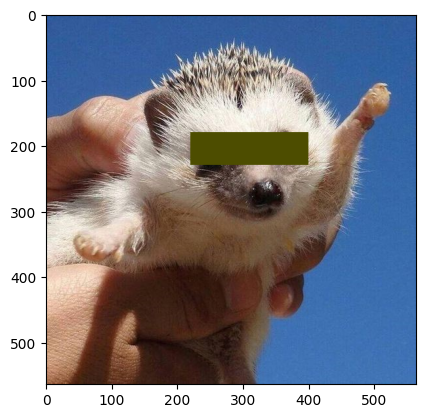

In [ ]:
print(img.shape)
img[180:230, 220:400] = [77, 77, 0]


plt.imshow(img)

(564, 564, 3)


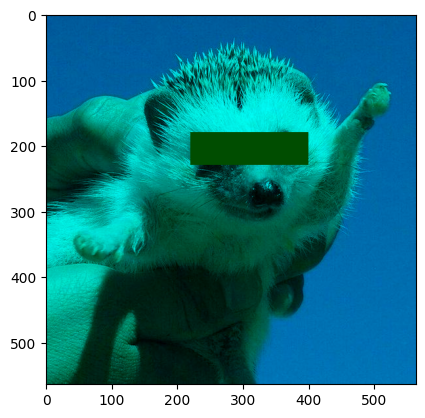

In [ ]:
print(img.shape)
img[:, :, 0] = 0


plt.imshow(img)

(564, 564, 3)


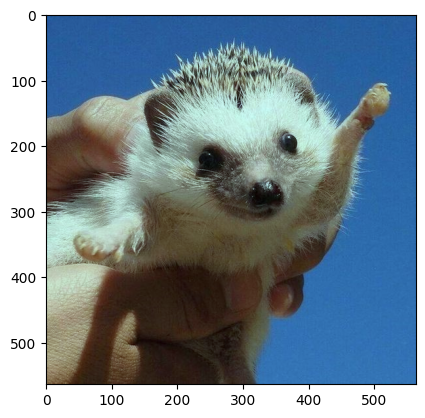

In [ ]:
print(img.shape)

img_less_red = img.copy()
img_less_red[:,:,0] = img_less_red[:,:,0]*0.8

plt.imshow(img_less_red)

In [55]:
print(img.shape)

img_less_red = img.copy()
img_nose_pxls = np.where(img_white_nose[:,:,0] < 20) and np.where(img_white_nose)
                         # and img_white_nose[:,:,0] )
img_white_nose[img_nose_pxls]=[255,255,255]

plt.imshow(img_white_nose)

(1276, 2000, 3)


NameError: ignored

## **9/26/23 Week 4**

### **Practice 1: Change the below picture's color to Black & White**

img shape
-> (H, W, 3) :여기서 3은 (R, G, B) > 밝기로 변환


(1276, 2000, 3)


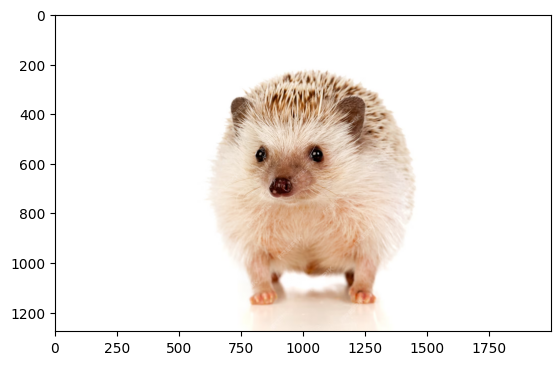

In [29]:
from skimage import io
import matplotlib.pyplot as plt

img = io.imread('/content/go.png')
img = img/255.0 # 그냥 정수로 나눠도 파이썬은 소수 결과로 나옴
# plt.imshow(img)
print(img.shape)

plt.imshow(img)

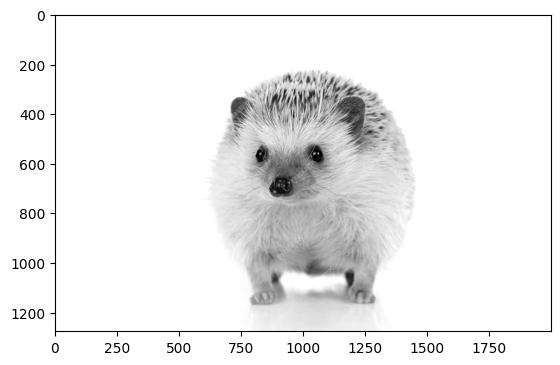

In [34]:
# 행의 개수와 열의 개수를 갖는 numpy array 를 만들어, 근데 0으로 채워진 배열 !
img_bw = np.zeros((img.shape[0], img.shape[1]))

# ------------------------------------------------------------------ #
# 1) Make a grayscale image with using 'for' quote.

# for j in range(img.shape[0]):
#   for i in range(img.shape[1]):
#     img_bw[j,i] = (img[j, i, 0] + img[j, i, 1] + img[j, i, 2])/3
# ------------------------------------------------------------------ #
# 2) Vectorization

#    - 코드 보고 이해가 쉬움 (r/g/b 채널 바닥을 더해서 3으로 나누는구나)
#    - 연산 속도도 더 빠름

# cf @ img_bw[j,:] = (img[j, :, 0] + img[j, :, 1] + img[j, :, 2])/3

img_bw[:,:] = (img[:, :, 0] + img[:, :, 1] + img[:, :, 2])/3
# ------------------------------------------------------------------ #

plt.imshow(img_bw, cmap='gray')

### Practice 2:

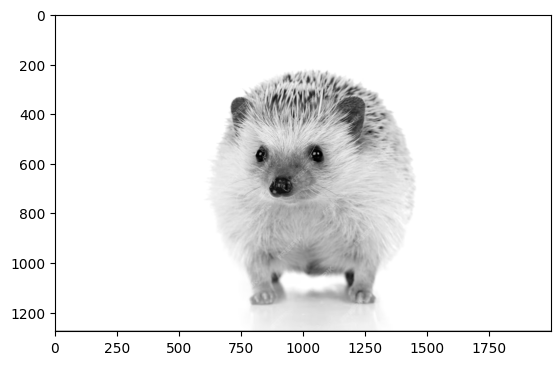

In [49]:
img_conv = np.zeros((img.shape[0], img.shape[1]))

kernel = np.array([1, 1, 1])

for j in range(1, img.shape[0]-1):
  for i in range(1, img.shape[1]-1):
    img_conv[j, i] = (kernel[0]*img_bw[j, i-1] + kernel[1]*img_bw[j, i] + kernel[2]*img_bw[j, i+1])/3

plt.imshow(img_conv, cmap='gray')

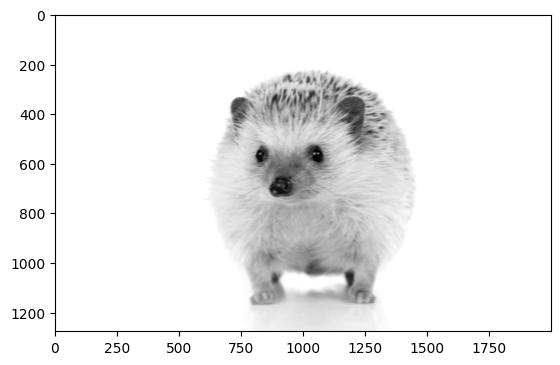

In [43]:
img_conv = img_bw.copy()

kernel = np.array([1, 1, 1])
for k in range(10):
  for j in range(1, img.shape[0]-1):
    for i in range(1, img.shape[1]-1):
      img_conv[j, i] = (kernel[0]*img_conv[j, i-1] +
                        kernel[1]*img_conv[j, i] +
                        kernel[2]*img_conv[j, i+1])/3

plt.imshow(img_conv, cmap='gray')

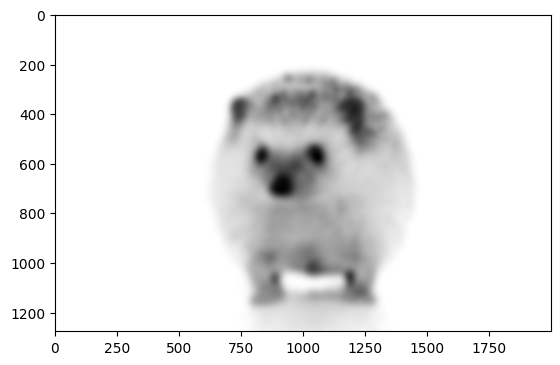

In [66]:
img_conv = img_bw.copy()

H = img.shape[0]
W = img.shape[1]

# kernel = np.array([1, 1, 1])

# for k in range(300):
#   img_conv[1 : H-1,1 : W-1] = (kernel[0]*img_conv[1: H-1, 0: W-2] +
#                                kernel[1]*img_conv[1: H-1, 1: W-1] +
#                                kernel[2]*img_conv[1: H-1, 2: W])/3

kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

for k in range(300):
  img_conv[1 : H-1,1 : W-1] = (kernel[0,0]*img_conv[0: H-2, 0 : W-2] +
                               kernel[0,1]*img_conv[0: H-2, 1 : W-1] + # 가로 방향 기준으로 커널 원소를 한 칸 씩 옮김
                               kernel[0,2]*img_conv[0: H-2, 2 : W] +
                               kernel[1,0]*img_conv[1: H-1, 0 : W-2] +
                               kernel[1,1]*img_conv[1: H-1, 1 : W-1] +
                               kernel[1,2]*img_conv[1: H-1, 2 : W] +
                               kernel[2,0]*img_conv[2: H, 0 : W-2] +
                               kernel[2,1]*img_conv[2: H, 1 : W-1] +
                               kernel[2,2]*img_conv[2: H, 2 : W])/9

plt.imshow(img_conv, cmap='gray')

In [ ]:
img_conv = img_bw.copy()

H = img.shape[0]
W = img.shape[1]

kernel = np.array([1, 1, 1], [1, 1, 1], [1, 1, 1])

for k in range(300):
  img_conv([1 : H-1,1 : W-1], [1 : H-1,1 : W-1], [1 : H-1,1 : W-1])  = (kernel[0]*img_conv[1: H-1, 0: W-2] +
                                                                        kernel[1]*img_conv[1: H-1, 1: W-1] +
                                                                        kernel[2]*img_conv[1: H-1, 2: W])/3



plt.imshow(img_conv, cmap='gray')